In [2]:
%matplotlib ipympl
import pandas as pd
import numpy as np
from statistics import NormalDist
from matplotlib import pyplot as plt

In [3]:
# Round 4
# Valentina - profitable trader?
# Vinnie - researcher and silent
# Vladimir - ruthless trader, spreding fake news and misinformation, coils around investments waiting for perfect squeeze
# Ruby - part-time, probably not a good trader
# Raj - likes to predict stock prices (fraud)
# Rhianna - rumoured to be dating Vinnie

In [4]:
def insider_trader_data(round: int, day: int):
  df_0 = pd.read_csv("trades_round_" + str(round) + "_day_" + str(day) + "_wn.csv", delimiter=";", index_col=False)
  
  df_1 = pd.read_csv("trades_round_" + str(round) + "_day_" + str(day + 1) + "_wn.csv", delimiter=";")

  df_2 = pd.read_csv("trades_round_" + str(round) + "_day_" + str(day + 2) + "_wn.csv", delimiter=";")

  return df_0, df_1, df_2

df0_r4, df1_r4, df2_r4 = insider_trader_data(4, 1)
df0_r4["buyer"].unique()
df2_r4["seller"].unique()

array(['Rhianna', 'Vinnie', 'Valentina', 'Raj', 'Ruby', 'Vladimir'],
      dtype=object)

In [5]:
def initialise_data(round: int, day: int):
  df0 = pd.read_csv("prices_round_" + str(round) + "_day_" + str(day) + ".csv", delimiter=";", index_col=False)
  coco0 = df0[df0["product"] == "COCONUT"]
  coco0.reset_index(drop = True, inplace=True)
  coup0 = df0[df0["product"] == "COCONUT_COUPON"]
  coup0.reset_index(drop = True, inplace=True)
  
  df1 = pd.read_csv("prices_round_" + str(round) + "_day_" + str(day + 1) + ".csv", delimiter=";")
  coco1 = df1[df1["product"] == "COCONUT"]
  coco1.reset_index(drop = True, inplace=True)
  coup1 = df1[df1["product"] == "COCONUT_COUPON"]
  coup1.reset_index(drop = True, inplace=True)

  df2 = pd.read_csv("prices_round_" + str(round) + "_day_" + str(day + 2) + ".csv", delimiter=";")
  coco2 = df2[df2["product"] == "COCONUT"]
  coco2.reset_index(drop = True, inplace=True)
  coup2 = df2[df2["product"] == "COCONUT_COUPON"]
  coup2.reset_index(drop = True, inplace=True)

  return coco0, coup0, coco1, coup1, coco2, coup2
coco_prices0_r4, coup_prices0_r4, coco_prices1_r4, coup_prices1_r4, coco_prices2_r4, coup_prices2_r4 = initialise_data(4, 1)

In [6]:
def black_scholes_price(S, K, t, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * (sigma**2)) * t) / (sigma * np.sqrt(t))
    # print("d1: " + str(d1))
    d2 = d1 - sigma * np.sqrt(t)
    # print("d2: " + str(d2))
    if option_type == 'call':
        price = S * NormalDist().cdf(d1) - K * np.exp(-r * t) * NormalDist().cdf(d2)
    else:
        price = K * np.exp(-r * t) * NormalDist().cdf(-d2) - S * NormalDist().cdf(-d1)
    return price
  
buy1 = black_scholes_price(9950, 10000, 250/365, 0.0, 0.1933295134, 'call')
buy2 = black_scholes_price(9950, 10000, 250/252, 0.0, 0.1606393714, 'call')
# buy = black_scholes_price(9938.5, 10000, 250/365, 0.0, 0.194, 'call')
# sell = black_scholes_price(9992, 10000, 50/73, 0.0, 0.2, 'put')
print("buy1 " + str(buy1))
print("buy2 " + str(buy2))

buy1 611.3473554807606
buy2 611.3473555012743


In [7]:
coco0 = df0_r4[df0_r4["symbol"] == "COCONUT"]
coup0 = df0_r4[df0_r4["symbol"] == "COCONUT_COUPON"]
coco1 = df1_r4[df1_r4["symbol"] == "COCONUT"]
coup1 = df1_r4[df1_r4["symbol"] == "COCONUT_COUPON"]
coco2 = df2_r4[df2_r4["symbol"] == "COCONUT"]
coup2 = df2_r4[df2_r4["symbol"] == "COCONUT_COUPON"]

In [8]:
mid_coco0 = coco_prices0_r4[["ask_price_3", "bid_price_3"]].copy()
mid_coco0["bid_price_3"] = mid_coco0["bid_price_3"].fillna(coco_prices0_r4['bid_price_2'])
mid_coco0["bid_price_3"] = mid_coco0["bid_price_3"].fillna(coco_prices0_r4['bid_price_1'])
mid_coco0["ask_price_3"] = mid_coco0["ask_price_3"].fillna(coco_prices0_r4['ask_price_2'])
mid_coco0["ask_price_3"] = mid_coco0["ask_price_3"].fillna(coco_prices0_r4['ask_price_1'])
mid_coco0.insert(2, "mid_price", (mid_coco0["ask_price_3"] + mid_coco0["bid_price_3"]) / 2)
mid_coco1 = coco_prices1_r4[["ask_price_3", "bid_price_3"]].copy()
mid_coco1["bid_price_3"] = mid_coco1["bid_price_3"].fillna(coco_prices1_r4['bid_price_2'])
mid_coco1["bid_price_3"] = mid_coco1["bid_price_3"].fillna(coco_prices1_r4['bid_price_1'])
mid_coco1["ask_price_3"] = mid_coco1["ask_price_3"].fillna(coco_prices1_r4['ask_price_2'])
mid_coco1["ask_price_3"] = mid_coco1["ask_price_3"].fillna(coco_prices1_r4['ask_price_1'])
mid_coco1.insert(2, "mid_price", (mid_coco1["ask_price_3"] + mid_coco1["bid_price_3"]) / 2)
mid_coco2 = coco_prices2_r4[["ask_price_3", "bid_price_3"]].copy()
mid_coco2["bid_price_3"] = mid_coco2["bid_price_3"].fillna(coco_prices2_r4['bid_price_2'])
mid_coco2["bid_price_3"] = mid_coco2["bid_price_3"].fillna(coco_prices2_r4['bid_price_1'])
mid_coco2["ask_price_3"] = mid_coco2["ask_price_3"].fillna(coco_prices2_r4['ask_price_2'])
mid_coco2["ask_price_3"] = mid_coco2["ask_price_3"].fillna(coco_prices2_r4['ask_price_1'])
mid_coco2.insert(2, "mid_price", (mid_coco2["ask_price_3"] + mid_coco2["bid_price_3"]) / 2)
coup0

,timestamp,buyer,seller,symbol,currency,price,quantity
0,800,Valentina,Valentina,COCONUT_COUPON,SEASHELLS,636.0,5
1,900,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,634.0,17
2,1100,Valentina,Ruby,COCONUT_COUPON,SEASHELLS,635.0,17
3,1900,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,635.0,16
4,2000,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,637.0,14
...,...,...,...,...,...,...,...
1710,997700,Valentina,Rhianna,COCONUT_COUPON,SEASHELLS,675.0,5
1711,997800,Valentina,Rhianna,COCONUT_COUPON,SEASHELLS,675.0,12
1712,998200,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,677.0,10
1713,999200,Valentina,Rhianna,COCONUT_COUPON,SEASHELLS,677.0,7


In [9]:
mid_coup0 = coup_prices0_r4[["ask_price_3", "bid_price_3"]].copy()
mid_coup0["bid_price_3"] = mid_coup0["bid_price_3"].fillna(coup_prices0_r4['bid_price_2'])
mid_coup0["bid_price_3"] = mid_coup0["bid_price_3"].fillna(coup_prices0_r4['bid_price_1'])
mid_coup0["ask_price_3"] = mid_coup0["ask_price_3"].fillna(coup_prices0_r4['ask_price_2'])
mid_coup0["ask_price_3"] = mid_coup0["ask_price_3"].fillna(coup_prices0_r4['ask_price_1'])
mid_coup0.insert(2, "mid_price", (mid_coup0["ask_price_3"] + mid_coup0["bid_price_3"]) / 2)
mid_coup1 = coup_prices1_r4[["ask_price_3", "bid_price_3"]].copy()
mid_coup1["bid_price_3"] = mid_coup1["bid_price_3"].fillna(coup_prices1_r4['bid_price_2'])
mid_coup1["bid_price_3"] = mid_coup1["bid_price_3"].fillna(coup_prices1_r4['bid_price_1'])
mid_coup1["ask_price_3"] = mid_coup1["ask_price_3"].fillna(coup_prices1_r4['ask_price_2'])
mid_coup1["ask_price_3"] = mid_coup1["ask_price_3"].fillna(coup_prices1_r4['ask_price_1'])
mid_coup1.insert(2, "mid_price", (mid_coup1["ask_price_3"] + mid_coup1["bid_price_3"]) / 2)
mid_coup2 = coup_prices2_r4[["ask_price_3", "bid_price_3"]].copy()
mid_coup2["bid_price_3"] = mid_coup2["bid_price_3"].fillna(coup_prices2_r4['bid_price_2'])
mid_coup2["bid_price_3"] = mid_coup2["bid_price_3"].fillna(coup_prices2_r4['bid_price_1'])
mid_coup2["ask_price_3"] = mid_coup2["ask_price_3"].fillna(coup_prices2_r4['ask_price_2'])
mid_coup2["ask_price_3"] = mid_coup2["ask_price_3"].fillna(coup_prices2_r4['ask_price_1'])
mid_coup2.insert(2, "mid_price", (mid_coup2["ask_price_3"] + mid_coup2["bid_price_3"]) / 2)

In [10]:
coup_predictions0 = mid_coco0["mid_price"]
coup_predictions0 = coup_predictions0.apply(lambda x: black_scholes_price(x, 10000, 250/365, 0.0, 0.1933295134, 'call'))
coup0.insert(7, "prediction", coup_predictions0)
coup_predictions1 = mid_coco1["mid_price"]
coup_predictions1 = coup_predictions1.apply(lambda x: black_scholes_price(x, 10000, 249/365, 0.0, 0.1933295134, 'call'))
coup1.insert(7, "prediction", coup_predictions1)
coup_predictions2 = mid_coco2["mid_price"]
coup_predictions2 = coup_predictions2.apply(lambda x: black_scholes_price(x, 10000, 248/365, 0.0, 0.1933295134, 'call'))
coup2.insert(7, "prediction", coup_predictions2)

In [11]:
#0
coco_buyer_count0 = coco0.groupby("buyer").size().reset_index(name="buy_count")
coco_seller_count0 = coco0.groupby("seller").size().reset_index(name="sell_count")
coco_count0 = pd.concat([coco_buyer_count0, coco_seller_count0], axis=1)
# coco_count0["buyer"].unique

In [12]:
coco_buyer_raj0 = coco0[coco0["buyer"] == "Raj"]
coco_seller_raj0 = coco0[coco0["seller"] == "Raj"]
coco_buyer_rhianna0 = coco0[coco0["buyer"] == "Rhianna"]
coco_seller_rhianna0 = coco0[coco0["seller"] == "Rhianna"]

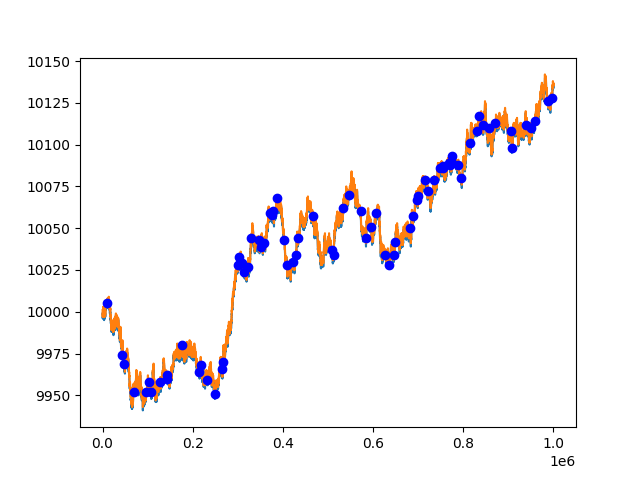

In [34]:
fig, axes = plt.subplots()
axes.plot(coco_prices0_r4["timestamp"], coco_prices0_r4["bid_price_1"])
axes.plot(coco_prices0_r4["timestamp"], coco_prices0_r4["ask_price_1"])
"""raj is the goat"""
axes.plot(coco0[coco0["buyer"] == "Raj"]["timestamp"], coco0[coco0["buyer"] == "Raj"]["price"], 'bo')
# axes.plot(coco0[coco0["seller"] == "Raj"]["timestamp"], coco0[coco0["seller"] == "Raj"]["price"], 'ro')
"""rhianna"""
#* axes.plot(coco0[coco0["buyer"] == "Rhianna"]["timestamp"], coco0[coco0["buyer"] == "Rhianna"]["price"], 'bo')
# axes.plot(coco0[coco0["seller"] == "Rhianna"]["timestamp"], coco0[coco0["seller"] == "Rhianna"]["price"], 'ro')
"""vinnie"""
# axes.plot(coco0[(coco0["buyer"] == "Vinnie") & (coco0["seller"] != "Vinnie")]["timestamp"], coco0[(coco0["buyer"] == "Vinnie") & (coco0["seller"] != "Vinnie")]["price"], 'bo')
# axes.plot(coco0[(coco0["buyer"] != "Vinnie") & (coco0["seller"] == "Vinnie")]["timestamp"], coco0[(coco0["buyer"] != "Vinnie") & (coco0["seller"] == "Vinnie")]["price"], 'ro')
# axes.plot(coco0[(coco0["buyer"] == "Vinnie") & (coco0["seller"] == "Vinnie")]["timestamp"], coco0[(coco0["buyer"] == "Vinnie") & (coco0["seller"] == "Vinnie")]["price"], 'go')
plt.show()

In [14]:
#1
coco_buyer_count1 = coco0.groupby("buyer").size().reset_index(name="buy_count")
coco_seller_count1 = coco0.groupby("seller").size().reset_index(name="sell_count")
coco_count1 = pd.concat([coco_buyer_count1, coco_seller_count1], axis=1)
# coco_count0["buyer"].unique

In [15]:
coco_buyer_count1 = coco1.groupby("buyer").size().reset_index(name="buy_count")
coco_seller_count1 = coco1.groupby("seller").size().reset_index(name="sell_count")
coco_count1 = pd.concat([coco_buyer_count1, coco_seller_count1], axis=1)
# coco_count0["buyer"].unique

In [16]:
coco_buyer_raj1 = coco1[coco1["buyer"] == "Raj"]
coco_seller_raj1 = coco1[coco1["seller"] == "Raj"]
coco_buyer_rhianna1 = coco1[coco1["buyer"] == "Rhianna"]
coco_seller_rhianna1 = coco1[coco1["seller"] == "Rhianna"]

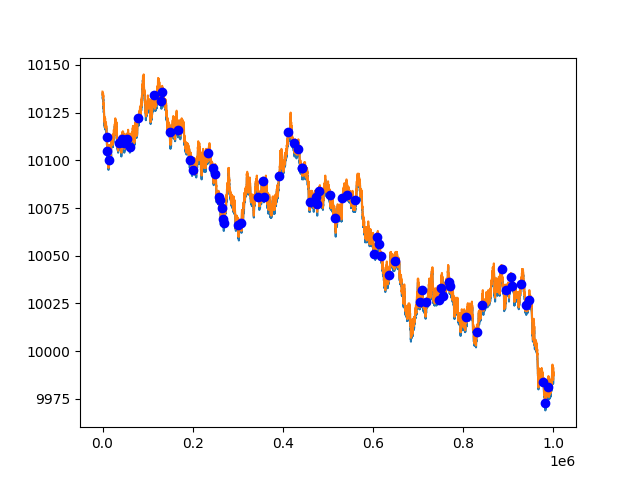

In [36]:
fig, axes = plt.subplots()
axes.plot(coco_prices1_r4["timestamp"], coco_prices1_r4["bid_price_1"])
axes.plot(coco_prices1_r4["timestamp"], coco_prices1_r4["ask_price_1"])
"""raj"""
axes.plot(coco1[coco1["buyer"] == "Raj"]["timestamp"], coco1[coco1["buyer"] == "Raj"]["price"], 'bo')
# axes.plot(coco1[coco1["seller"] == "Raj"]["timestamp"], coco1[coco1["seller"] == "Raj"]["price"], 'ro')
"""rhianna"""
# axes.plot(coco1[coco1["buyer"] == "Rhianna"]["timestamp"], coco1[coco1["buyer"] == "Rhianna"]["price"], 'bo')
# axes.plot(coco1[coco1["seller"] == "Rhianna"]["timestamp"], coco1[coco1["seller"] == "Rhianna"]["price"], 'ro')
"""vinnie"""
# axes.plot(coco1[(coco1["buyer"] == "Vinnie") & (coco1["seller"] != "Vinnie")]["timestamp"], coco1[(coco0["buyer"] == "Vinnie") & (coco1["seller"] != "Vinnie")]["price"], 'bo')
# axes.plot(coco1[(coco1["buyer"] != "Vinnie") & (coco1["seller"] == "Vinnie")]["timestamp"], coco1[(coco0["buyer"] != "Vinnie") & (coco1["seller"] == "Vinnie")]["price"], 'ro')
# axes.plot(coco1[(coco1["buyer"] == "Vinnie") & (coco1["seller"] == "Vinnie")]["timestamp"], coco1[(coco0["buyer"] == "Vinnie") & (coco1["seller"] == "Vinnie")]["price"], 'go')
plt.show()

In [18]:
coco_buyer_raj2 = coco2[coco2["buyer"] == "Raj"]
coco_seller_raj2 = coco2[coco2["seller"] == "Raj"]
coco_buyer_rhianna2 = coco2[coco2["buyer"] == "Rhianna"]
coco_seller_rhianna2 = coco2[coco2["seller"] == "Rhianna"]

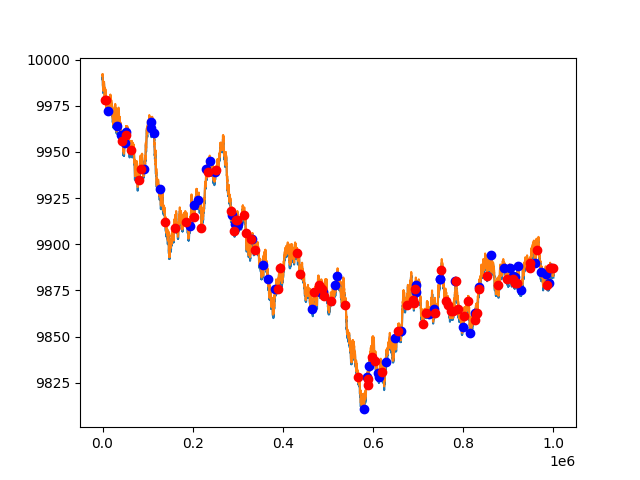

In [37]:
fig, axes = plt.subplots()
axes.plot(coco_prices2_r4["timestamp"], coco_prices2_r4["bid_price_1"])
axes.plot(coco_prices2_r4["timestamp"], coco_prices2_r4["ask_price_1"])
"""raj"""
axes.plot(coco2[coco2["buyer"] == "Raj"]["timestamp"], coco2[coco2["buyer"] == "Raj"]["price"], 'bo')
axes.plot(coco2[coco2["seller"] == "Raj"]["timestamp"], coco2[coco2["seller"] == "Raj"]["price"], 'ro')
"""rhianna"""
# axes.plot(coco2[coco2["buyer"] == "Rhianna"]["timestamp"], coco2[coco2["buyer"] == "Rhianna"]["price"], 'bo')
# axes.plot(coco2[coco2["seller"] == "Rhianna"]["timestamp"], coco2[coco2["seller"] == "Rhianna"]["price"], 'ro')
"""vinnie"""
# axes.plot(coco2[(coco2["buyer"] == "Vinnie") & (coco2["seller"] != "Vinnie")]["timestamp"], coco2[(coco0["buyer"] == "Vinnie") & (coco2["seller"] != "Vinnie")]["price"], 'bo')
# axes.plot(coco2[(coco2["buyer"] != "Vinnie") & (coco2["seller"] == "Vinnie")]["timestamp"], coco2[(coco0["buyer"] != "Vinnie") & (coco2["seller"] == "Vinnie")]["price"], 'ro')
# axes.plot(coco2[(coco2["buyer"] == "Vinnie") & (coco2["seller"] == "Vinnie")]["timestamp"], coco2[(coco0["buyer"] == "Vinnie") & (coco2["seller"] == "Vinnie")]["price"], 'go')
plt.show()

In [20]:
plt.plot(coco_prices1_r4["timestamp"], coco_prices1_r4["ask_price_1"])

In [21]:
coup_buyer_count0 = coup0.groupby("buyer").size().reset_index(name="buy_count")
coup_seller_count0 = coup0.groupby("seller").size().reset_index(name="sell_count")
coup_count0 = pd.concat([coup_buyer_count0, coup_seller_count0], axis=1)
coup_count0

,buyer,buy_count,seller,sell_count
0,Rhianna,6,Rhianna,117
1,Ruby,126,Ruby,142
2,Valentina,831,Valentina,230
3,Vinnie,8,Vinnie,549
4,Vladimir,77,Vladimir,10


In [22]:
coup_buyer_valentina0 = coup0[coup0["buyer"] == "Valentina"]
coup_seller_valentina0 = coup0[coup0["seller"] == "Valentina"]
# vinnie sells to valentina most of the time
coup_buyer_vinnie0 = coup0[coup0["buyer"] == "Vinnie"]
coup_seller_vinnie0 = coup0[coup0["seller"] == "Vinnie"]

coup_buyer_vladimir0 = coup0[coup0["buyer"] == "Vladimir"]
coup_seller_vladimir0 = coup0[coup0["seller"] == "Vladimir"]

coup_buyer_ruby0 = coup0[coup0["buyer"] == "Ruby"]
coup_seller_ruby0 = coup0[coup0["seller"] == "Ruby"]

coup_buyer_rhianna0 = coup0[coup0["buyer"] == "Rhianna"]
coup_seller_rhianna0 = coup0[coup0["seller"] == "Rhianna"]

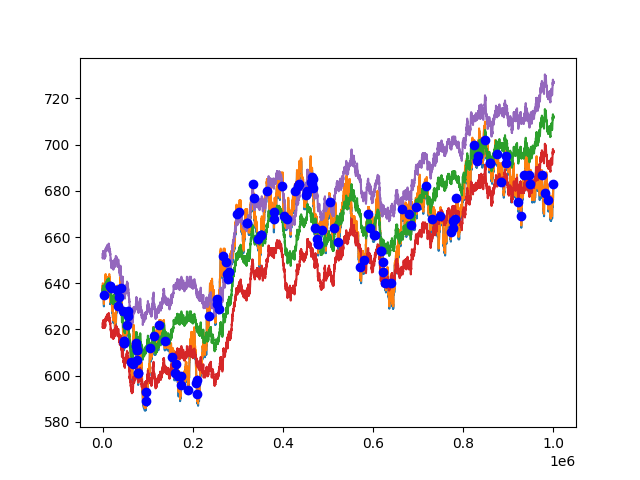

In [23]:
diff = 15;
fig, axes = plt.subplots()
axes.plot(coup_prices0_r4["timestamp"], coup_prices0_r4["bid_price_1"])
axes.plot(coup_prices0_r4["timestamp"], coup_prices0_r4["ask_price_1"])
axes.plot(coup_prices0_r4["timestamp"], coup_predictions0)
axes.plot(coup_prices0_r4["timestamp"], coup_predictions0-diff)
axes.plot(coup_prices0_r4["timestamp"], coup_predictions0+diff)
"""valentina"""
# axes.plot(coup0[(coup0["buyer"] == "Valentina") & (coup0["seller"] != "Valentina")]["timestamp"], coup0[(coup0["buyer"] == "Valentina") & (coup0["seller"] != "Valentina")]["price"], 'bo')
# axes.plot(coup0[(coup0["buyer"] != "Valentina") & (coup0["seller"] == "Valentina")]["timestamp"], coup0[(coup0["buyer"] != "Valentina") & (coup0["seller"] == "Valentina")]["price"], 'ro')
# axes.plot(coup0[(coup0["buyer"] == "Valentina") & (coup0["seller"] == "Valentina")]["timestamp"], coup0[(coup0["buyer"] == "Valentina") & (coup0["seller"] == "Valentina")]["price"], 'go')
"""vinnie"""
# axes.plot(coup0[(coup0["buyer"] == "Vinnie") & (coup0["seller"] != "Vinnie")]["timestamp"], coup0[(coup0["buyer"] == "Vinnie") & (coup0["seller"] != "Vinnie")]["price"], 'bo')
# axes.plot(coup0[(coup0["buyer"] != "Vinnie") & (coup0["seller"] == "Vinnie")]["timestamp"], coup0[(coup0["buyer"] != "Vinnie") & (coup0["seller"] == "Vinnie")]["price"], 'ro')
# axes.plot(coup0[(coup0["buyer"] == "Vinnie") & (coup0["seller"] == "Vinnie")]["timestamp"], coup0[(coup0["buyer"] == "Vinnie") & (coup0["seller"] == "Vinnie")]["price"], 'go')
"""vladimir"""
# axes.plot(coup0[(coup0["buyer"] == "Vladimir") & (coup0["seller"] != "Vladimir")]["timestamp"], coup0[(coup0["buyer"] == "Vladimir") & (coup0["seller"] != "Vladimir")]["price"], 'bo')
# axes.plot(coup0[(coup0["buyer"] != "Vladimir") & (coup0["seller"] == "Vladimir")]["timestamp"], coup0[(coup0["buyer"] != "Vladimir") & (coup0["seller"] == "Vladimir")]["price"], 'ro')
# axes.plot(coup0[(coup0["buyer"] == "Vladimir") & (coup0["seller"] == "Vladimir")]["timestamp"], coup0[(coup0["buyer"] == "Vladimir") & (coup0["seller"] == "Vladimir")]["price"], 'go')
"""!ruby"""
axes.plot(coup0[(coup0["buyer"] == "Ruby") & (coup0["seller"] != "Ruby")]["timestamp"], coup0[(coup0["buyer"] == "Ruby") & (coup0["seller"] != "Ruby")]["price"], 'bo')
# axes.plot(coup0[(coup0["buyer"] != "Ruby") & (coup0["seller"] == "Ruby")]["timestamp"], coup0[(coup0["buyer"] != "Ruby") & (coup0["seller"] == "Ruby")]["price"], 'ro')
# axes.plot(coup0[(coup0["buyer"] == "Ruby") & (coup0["seller"] == "Ruby")]["timestamp"], coup0[(coup0["buyer"] == "Ruby") & (coup0["seller"] == "Ruby")]["price"], 'go')
"""rhianna"""
# axes.plot(coup0[(coup0["buyer"] == "Rhianna") & (coup0["seller"] != "Rhianna")]["timestamp"], coup0[(coup0["buyer"] == "Rhianna") & (coup0["seller"] != "Rhianna")]["price"], 'bo')
# axes.plot(coup0[(coup0["buyer"] != "Rhianna") & (coup0["seller"] == "Rhianna")]["timestamp"], coup0[(coup0["buyer"] != "Rhianna") & (coup0["seller"] == "Rhianna")]["price"], 'ro')
# axes.plot(coup0[(coup0["buyer"] == "Rhianna") & (coup0["seller"] == "Rhianna")]["timestamp"], coup0[(coup0["buyer"] == "Rhianna") & (coup0["seller"] == "Rhianna")]["price"], 'go')
plt.show()

In [24]:
coup_buyer_count1 = coup1.groupby("buyer").size().reset_index(name="buy_count")
coup_seller_count1 = coup1.groupby("seller").size().reset_index(name="sell_count")
coup_count1 = pd.concat([coup_buyer_count1, coup_seller_count1], axis=1)
coup_count1

,buyer,buy_count,seller,sell_count
0,Rhianna,1,Rhianna,128
1,Ruby,134,Ruby,143
2,Valentina,860,Valentina,228
3,Vinnie,10,Vinnie,559
4,Vladimir,69,Vladimir,16


In [25]:
coup_buyer_valentina1 = coup1[coup1["buyer"] == "Valentina"]
coup_seller_valentina1 = coup1[coup1["seller"] == "Valentina"]
# vinnie sells to valentina most of the time
coup_buyer_vinnie1 = coup1[coup1["buyer"] == "Vinnie"]
coup_seller_vinnie1 = coup1[coup1["seller"] == "Vinnie"]

coup_buyer_vladimir1 = coup1[coup1["buyer"] == "Vladimir"]
coup_seller_vladimir1 = coup1[coup1["seller"] == "Vladimir"]

coup_buyer_ruby1 = coup1[coup1["buyer"] == "Ruby"]
coup_seller_ruby1 = coup1[coup1["seller"] == "Ruby"]

coup_buyer_rhianna1 = coup1[coup1["buyer"] == "Rhianna"]
coup_seller_rhianna1 = coup1[coup1["seller"] == "Rhianna"]

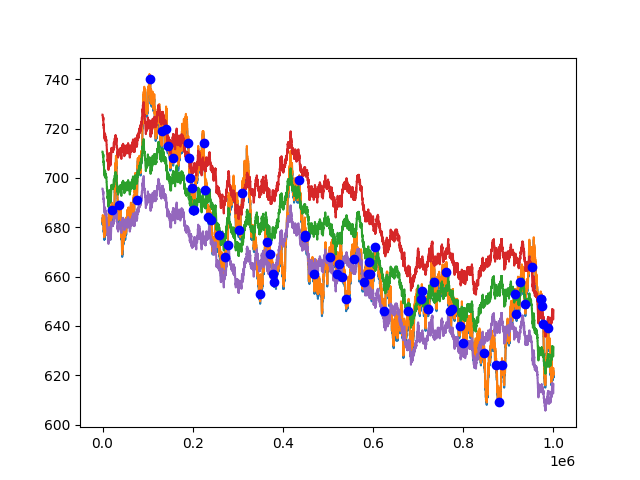

In [26]:
diff = 15
fig, axes = plt.subplots()
axes.plot(coup_prices1_r4["timestamp"], coup_prices1_r4["bid_price_1"])
axes.plot(coup_prices1_r4["timestamp"], coup_prices1_r4["ask_price_1"])
axes.plot(coup_prices1_r4["timestamp"], coup_predictions1)
axes.plot(coup_prices1_r4["timestamp"], coup_predictions1+diff)
axes.plot(coup_prices1_r4["timestamp"], coup_predictions1-diff)
"""valentina"""
#! axes.plot(coup1[(coup1["buyer"] == "Valentina") & (coup1["seller"] != "Valentina")]["timestamp"], coup1[(coup1["buyer"] == "Valentina") & (coup1["seller"] != "Valentina")]["price"], 'bo')
#! axes.plot(coup1[(coup1["buyer"] != "Valentina") & (coup1["seller"] == "Valentina")]["timestamp"], coup1[(coup1["buyer"] != "Valentina") & (coup1["seller"] == "Valentina")]["price"], 'ro')
#! axes.plot(coup1[(coup1["buyer"] == "Valentina") & (coup1["seller"] == "Valentina")]["timestamp"], coup1[(coup1["buyer"] == "Valentina") & (coup1["seller"] == "Valentina")]["price"], 'go')
"""vinnie"""
# axes.plot(coup1[(coup1["buyer"] == "Vinnie") & (coup1["seller"] != "Vinnie")]["timestamp"], coup1[(coup1["buyer"] == "Vinnie") & (coup1["seller"] != "Vinnie")]["price"], 'bo')
# ! axes.plot(coup1[(coup1["buyer"] != "Vinnie") & (coup1["seller"] == "Vinnie")]["timestamp"], coup1[(coup1["buyer"] != "Vinnie") & (coup1["seller"] == "Vinnie")]["price"], 'ro')
# axes.plot(coup1[(coup1["buyer"] == "Vinnie") & (coup1["seller"] == "Vinnie")]["timestamp"], coup1[(coup1["buyer"] == "Vinnie") & (coup1["seller"] == "Vinnie")]["price"], 'go')
"""vladimir"""
axes.plot(coup1[(coup1["buyer"] == "Vladimir") & (coup1["seller"] != "Vladimir")]["timestamp"], coup1[(coup1["buyer"] == "Vladimir") & (coup1["seller"] != "Vladimir")]["price"], 'bo')
#* wrong logic axes.plot(coup1[(coup1["buyer"] == "Vladimir") & (coup1["seller"] != "Vladimir") & ((coup1["price"] > coup1["prediction"]+diff) | (coup1["price"] < coup1["prediction"]-diff))]["timestamp"], coup1[(coup1["buyer"] == "Vladimir") & (coup1["seller"] != "Vladimir")& ((coup1["price"] > coup1["prediction"] + diff) | (coup1["price"] < coup1["prediction"]-diff))]["price"], 'bo')
# axes.plot(coup1[(coup1["buyer"] != "Vladimir") & (coup1["seller"] == "Vladimir")]["timestamp"], coup1[(coup1["buyer"] != "Vladimir") & (coup1["seller"] == "Vladimir")]["price"], 'ro')
#! axes.plot(coup1[(coup1["buyer"] == "Vladimir") & (coup1["seller"] == "Vladimir")]["timestamp"], coup1[(coup1["buyer"] == "Vladimir") & (coup1["seller"] == "Vladimir")]["price"], 'go')
"""!ruby"""
# axes.plot(coup1[(coup1["buyer"] == "Ruby") & (coup1["seller"] != "Ruby")]["timestamp"], coup1[(coup1["buyer"] == "Ruby") & (coup1["seller"] != "Ruby")]["price"], 'bo')
# axes.plot(coup1[(coup1["buyer"] != "Ruby") & (coup1["seller"] == "Ruby")]["timestamp"], coup1[(coup1["buyer"] != "Ruby") & (coup1["seller"] == "Ruby")]["price"], 'ro')
#! axes.plot(coup1[(coup1["buyer"] == "Ruby") & (coup1["seller"] == "Ruby")]["timestamp"], coup1[(coup1["buyer"] == "Ruby") & (coup1["seller"] == "Ruby")]["price"], 'go')
"""rhianna"""
#! axes.plot(coup1[(coup1["buyer"] == "Rhianna") & (coup1["seller"] != "Rhianna")]["timestamp"], coup1[(coup1["buyer"] == "Rhianna") & (coup1["seller"] != "Rhianna")]["price"], 'bo')
#! axes.plot(coup1[(coup1["buyer"] != "Rhianna") & (coup1["seller"] == "Rhianna")]["timestamp"], coup1[(coup1["buyer"] != "Rhianna") & (coup1["seller"] == "Rhianna")]["price"], 'ro')
#! axes.plot(coup1[(coup1["buyer"] == "Rhianna") & (coup1["seller"] == "Rhianna")]["timestamp"], coup1[(coup1["buyer"] == "Rhianna") & (coup1["seller"] == "Rhianna")]["price"], 'go')
plt.show()

In [27]:
coup_buyer_count2 = coup2.groupby("buyer").size().reset_index(name="buy_count")
coup_seller_count2 = coup2.groupby("seller").size().reset_index(name="sell_count")
coup_count2 = pd.concat([coup_buyer_count2, coup_seller_count2], axis=1)
coup_count2

,buyer,buy_count,seller,sell_count
0,Rhianna,3,Rhianna,143
1,Ruby,120,Ruby,154
2,Valentina,840,Valentina,213
3,Vinnie,7,Vinnie,515
4,Vladimir,68,Vladimir,13


In [28]:
coup_buyer_valentina2 = coup2[coup2["buyer"] == "Valentina"]
coup_seller_valentina2 = coup2[coup2["seller"] == "Valentina"]
# vinnie sells to valentina most of the time
coup_buyer_vinnie2 = coup2[coup2["buyer"] == "Vinnie"]
coup_seller_vinnie2 = coup2[coup2["seller"] == "Vinnie"]

coup_buyer_vladimir2 = coup2[coup2["buyer"] == "Vladimir"]
coup_seller_vladimir2 = coup2[coup2["seller"] == "Vladimir"]

coup_buyer_ruby2 = coup2[coup2["buyer"] == "Ruby"]
coup_seller_ruby2 = coup2[coup2["seller"] == "Ruby"]

coup_buyer_rhianna2 = coup2[coup2["buyer"] == "Rhianna"]
coup_seller_rhianna2 = coup2[coup2["seller"] == "Rhianna"]

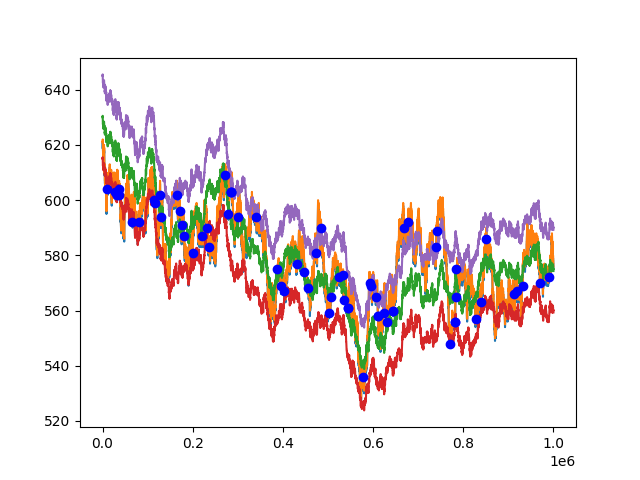

In [29]:
diff = 15
fig, axes = plt.subplots()
axes.plot(coup_prices2_r4["timestamp"], coup_prices2_r4["bid_price_1"])
axes.plot(coup_prices2_r4["timestamp"], coup_prices2_r4["ask_price_1"])
axes.plot(coup_prices2_r4["timestamp"], coup_predictions2)
axes.plot(coup_prices2_r4["timestamp"], coup_predictions2-diff)
axes.plot(coup_prices2_r4["timestamp"], coup_predictions2+diff)
"""valentina"""
# axes.plot(coup2[(coup2["buyer"] == "Valentina") & (coup2["seller"] != "Valentina")]["timestamp"], coup2[(coup2["buyer"] == "Valentina") & (coup2["seller"] != "Valentina")]["price"], 'bo')
# axes.plot(coup2[(coup2["buyer"] != "Valentina") & (coup2["seller"] == "Valentina")]["timestamp"], coup2[(coup2["buyer"] != "Valentina") & (coup2["seller"] == "Valentina")]["price"], 'ro')
# axes.plot(coup2[(coup2["buyer"] == "Valentina") & (coup2["seller"] == "Valentina")]["timestamp"], coup2[(coup2["buyer"] == "Valentina") & (coup2["seller"] == "Valentina")]["price"], 'go')
"""vinnie"""
# axes.plot(coup2[(coup2["buyer"] == "Vinnie") & (coup2["seller"] != "Vinnie")]["timestamp"], coup2[(coup2["buyer"] == "Vinnie") & (coup2["seller"] != "Vinnie")]["price"], 'bo')
# axes.plot(coup2[(coup2["buyer"] != "Vinnie") & (coup2["seller"] == "Vinnie")]["timestamp"], coup2[(coup2["buyer"] != "Vinnie") & (coup2["seller"] == "Vinnie")]["price"], 'ro')
# axes.plot(coup2[(coup2["buyer"] == "Vinnie") & (coup2["seller"] == "Vinnie")]["timestamp"], coup2[(coup2["buyer"] == "Vinnie") & (coup2["seller"] == "Vinnie")]["price"], 'go')
"""vladimir"""
axes.plot(coup2[(coup2["buyer"] == "Vladimir") & (coup2["seller"] != "Vladimir")]["timestamp"], coup2[(coup2["buyer"] == "Vladimir") & (coup2["seller"] != "Vladimir")]["price"], 'bo')
# axes.plot(coup2[(coup2["buyer"] != "Vladimir") & (coup2["seller"] == "Vladimir")]["timestamp"], coup2[(coup2["buyer"] != "Vladimir") & (coup2["seller"] == "Vladimir")]["price"], 'ro')
# axes.plot(coup2[(coup2["buyer"] == "Vladimir") & (coup2["seller"] == "Vladimir")]["timestamp"], coup2[(coup2["buyer"] == "Vladimir") & (coup2["seller"] == "Vladimir")]["price"], 'go')
"""!ruby"""
# axes.plot(coup2[(coup2["buyer"] == "Ruby") & (coup2["seller"] != "Ruby")]["timestamp"], coup2[(coup2["buyer"] == "Ruby") & (coup2["seller"] != "Ruby")]["price"], 'bo')
# axes.plot(coup2[(coup2["buyer"] != "Ruby") & (coup2["seller"] == "Ruby")]["timestamp"], coup2[(coup2["buyer"] != "Ruby") & (coup2["seller"] == "Ruby")]["price"], 'ro')
# axes.plot(coup2[(coup2["buyer"] == "Ruby") & (coup2["seller"] == "Ruby")]["timestamp"], coup2[(coup2["buyer"] == "Ruby") & (coup2["seller"] == "Ruby")]["price"], 'go')
"""rhianna"""
# axes.plot(coup2[(coup2["buyer"] == "Rhianna") & (coup2["seller"] != "Rhianna")]["timestamp"], coup2[(coup2["buyer"] == "Rhianna") & (coup2["seller"] != "Rhianna")]["price"], 'bo')
# axes.plot(coup2[(coup2["buyer"] != "Rhianna") & (coup2["seller"] == "Rhianna")]["timestamp"], coup2[(coup2["buyer"] != "Rhianna") & (coup2["seller"] == "Rhianna")]["price"], 'ro')
# axes.plot(coup2[(coup2["buyer"] == "Rhianna") & (coup2["seller"] == "Rhianna")]["timestamp"], coup2[(coup2["buyer"] == "Rhianna") & (coup2["seller"] == "Rhianna")]["price"], 'go')
plt.show()

In [30]:
diff0 = mid_coup0["mid_price"] - coup_predictions0
diff1 = mid_coup1["mid_price"] - coup_predictions1
diff2 = mid_coup2["mid_price"] - coup_predictions2

In [31]:
differences = pd.Series(diff0.to_list() + diff1.to_list() + diff2.to_list())
print("OVERALL MEAN: " + str(differences.mean()))
print("OVERALL STD: " + str(differences.std()))
diff3 = pd.Series(diff0.to_list())
print("MEAN1: " + str(diff3.mean()))
print("STD1: " + str(diff3.std()))
diff4 = pd.Series(diff1.to_list())
print("MEAN2: " + str(diff4.mean()))
print("STD2: " + str(diff4.std()))
diff5 = pd.Series(diff2.to_list())
print("MEAN3: " + str(diff5.mean()))
print("STD3: " + str(diff5.std()))

OVERALL MEAN: -2.241952504270717
OVERALL STD: 13.530582431810915
MEAN1: -2.8153402952741953
STD1: 13.840303863633933
MEAN2: -4.44383557015453
STD2: 14.704013480457226
MEAN3: 0.533375697130125
STD3: 11.341203807371912
